In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import pandas as pd

In [37]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt, pcov = curve_fit(f=straight_line, xdata=xs, ydata=ys)
    xFit = np.arange(min(xs),max(xs)+1e-4, 2e-4)
    m, c = popt[0], popt[1]
    print(c)
    return xFit, straight_line(xFit, m, c), m, pcov[0][0]**0.5

In [26]:
def error(xs, delxs):
    e2 = 0
    for x, delx in zip(xs, delxs):
        # n = 1 if len(param) <= 2 else param[2]
        e2 += (delx/x)**2
    return e2**0.5
def error_avg(delxs):
    n = len(delxs)
    return error(np.zeros(n)+1, delxs)/np.sqrt(n)

In [30]:
1/(600)

0.0016666666666666668

-7144.128865842964


(31.619018357784775, 5)

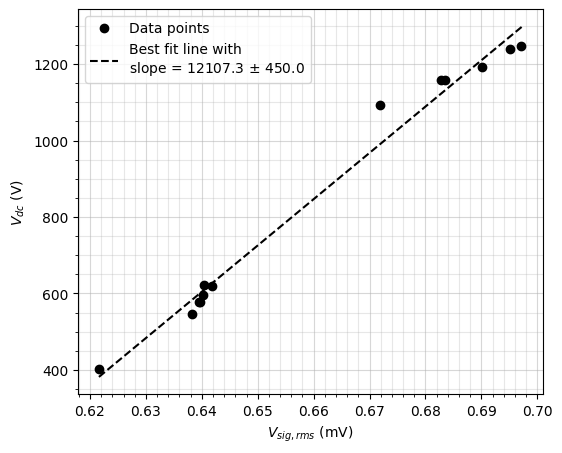

In [56]:
cal50 = pd.read_excel('analysis1.xlsx', sheet_name='Sheet5')
m50, err50 = [], []
plt.figure(figsize=(6,5))
fits = fit_line(cal50['x'], cal50['y'])
plt.plot(cal50['x'], cal50['y'], 'ko', label='Data points')
plt.plot(fits[0], fits[1], '--k', label=f'Best fit line with\nslope = {round(fits[2],1)} $\pm$ {round(fits[3],1)}')
plt.xlabel(r'$V_{sig, rms}$ (mV)')
plt.ylabel(r'$V_{dc}$ (V)')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.3)
# plt.xlim(0,1)
53.6*768/(1301.9), 5

In [ ]:
M = (fits_beta[2]*4800*1e6)/(2*np.pi*mu100)
Merr = M*error([mu100, 4800, fits_beta[2]], [mu100err, 10, fits_beta[3]])
print(f'Mutual inductance = {M} \pm {Merr} \mu H')

Mutual inductance = 168.258817012333 \pm 9.495647386760142 \mu H
